# Data Explorer for SHREC, PPAC, Ruth

In [1]:
!pip install numba
import sys
print(sys.executable)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numba
print(numba.__version__)

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
# Get data
dssd = pd.read_csv('processed_data/dssd_non_vetoed_events.csv') # non-vetoed, calibrated dssd events 
ppac = pd.read_csv('processed_data/ppac_events.csv')
ruth = pd.read_csv('processed_data/rutherford_events.csv')

In [3]:
# DSSD regions
imp = dssd[dssd['event_type'] == 'imp']
boxE = dssd[dssd['event_type'] == 'boxE']
boxW = dssd[dssd['event_type'] == 'boxW']
boxT = dssd[dssd['event_type'] == 'boxT']
boxB = dssd[dssd['event_type'] == 'boxB']

# PPAC 
cathode = ppac[ppac['detector'] == 'cathode']
anodeV = ppac[ppac['detector'] == 'anodeV']
anodeH = ppac[ppac['detector'] == 'anodeH']

# Rutherfords
ruth_E = ruth[ruth['detector'] == 'ruthE']
ruth_W = ruth[ruth['detector'] == 'ruthW']

In [4]:
def print_df_info(df, name):
    print(f"\n{'='*50}")
    print(f"{name.upper()} DATAFRAME SUMMARY")
    print(f"{'='*50}")
    print(f"Total Rows: {len(df)}")
    print("\nColumns:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col:<15} - {df[col].dtype}")
    print(f"\nFirst 5 Rows:\n{df.head()}")

In [5]:
# Print summaries
print_df_info(dssd, "DSSD")
print_df_info(ppac, "PPAC")
print_df_info(ruth, "Rutherford")


DSSD DATAFRAME SUMMARY
Total Rows: 1239046

Columns:
 1. t               - float64
 2. x               - int64
 3. y               - int64
 4. tagx            - int64
 5. tagy            - int64
 6. nfile           - int64
 7. tdelta          - int64
 8. nX              - int64
 9. nY              - int64
10. xE              - float64
11. yE              - float64
12. event_type      - object

First 5 Rows:
          t    x   y         tagx         tagy  nfile  tdelta  nX  nY  \
0  0.017095   54  34  17095489493  17095463494      0   25999   1   1   
1  0.024979  146  51  24978673999  24978499999      0  174000   1   1   
2  0.028571   13  34  28571225997  28571304002      0  -78005   1   1   
3  0.038022    7  13  38021869998  38021938992      0  -68994   1   1   
4  0.042177   47   1  42176576999  42176520005      0   56994   1   1   

           xE          yE event_type  
0  486.140568  595.670787        imp  
1  355.057254  352.445443        imp  
2  307.739835  354.800657       

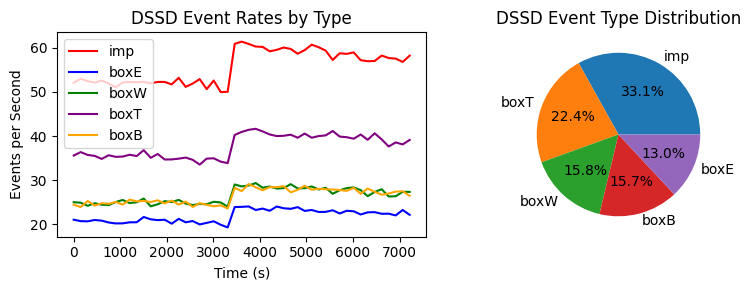

In [6]:
# Need to understand timing first
plt.figure(figsize=(12, 3))
plt.subplot(131)
for event_type, color in zip(['imp', 'boxE', 'boxW', 'boxT', 'boxB'], 
                              ['red', 'blue', 'green', 'purple', 'orange']):
    subset = dssd[dssd['event_type'] == event_type]
    bins = np.linspace(dssd['t'].min(), dssd['t'].max(), num=50)
    event_counts, _ = np.histogram(subset['t'], bins=bins)
    time_intervals = np.diff(bins)
    events_per_second = event_counts / time_intervals
    plt.plot(bins[:-1], events_per_second, label=event_type, color=color)

plt.title('DSSD Event Rates by Type')
plt.xlabel('Time (s)')
plt.ylabel('Events per Second')
plt.legend()

# Event type distribution pie chart
plt.subplot(132)
event_counts = dssd['event_type'].value_counts()
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%')
plt.title('DSSD Event Type Distribution')

plt.tight_layout()
plt.show()



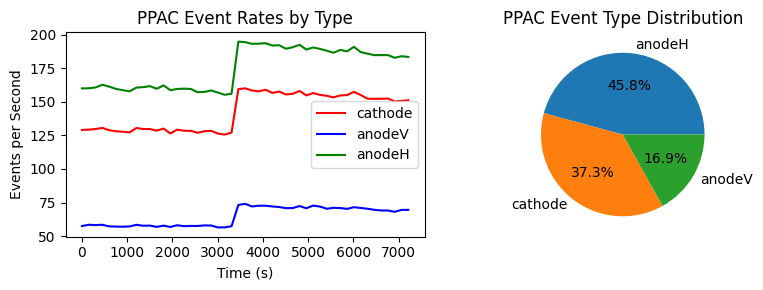

In [7]:
# Need to understand timing first
plt.figure(figsize=(12, 3))
plt.subplot(131)
for event_type, color in zip(['cathode', 'anodeV', 'anodeH'], 
                              ['red', 'blue', 'green', 'purple', 'orange']):
    subset = ppac[ppac['detector'] == event_type]
    bins = np.linspace(dssd['t'].min(), dssd['t'].max(), num=50)
    event_counts, _ = np.histogram(subset['t'], bins=bins)
    time_intervals = np.diff(bins)
    events_per_second = event_counts / time_intervals
    plt.plot(bins[:-1], events_per_second, label=event_type, color=color)

plt.title('PPAC Event Rates by Type')
plt.xlabel('Time (s)')
plt.ylabel('Events per Second')
plt.legend()

# Event type distribution pie chart
plt.subplot(132)
event_counts = ppac['detector'].value_counts()
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%')
plt.title('PPAC Event Type Distribution')

plt.tight_layout()
plt.show()


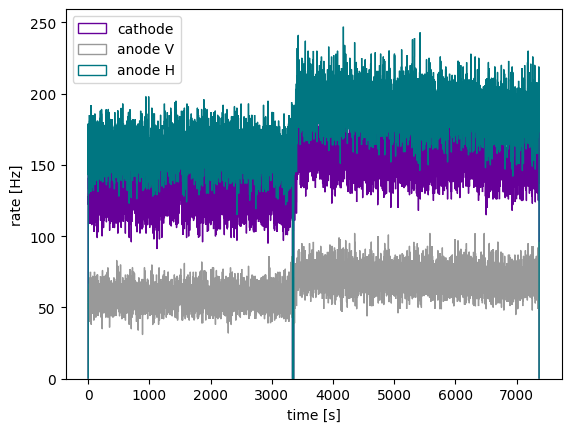

In [8]:
tfile = math.ceil(max(cathode['timetag'])*1e-12)
plt.hist(cathode['timetag']*1e-12, bins = np.arange(0, tfile, 1), histtype = 'step', color = '#660099', label = 'cathode')
plt.hist(anodeV['timetag']*1e-12, bins = np.arange(0, tfile, 1), histtype = 'step', color = '#999999', label = 'anode V')
plt.hist(anodeH['timetag']*1e-12, bins = np.arange(0, tfile, 1), histtype = 'step', color = '#007681', label = 'anode H')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('rate [Hz]')
plt.show()

Using coincidence window: 3.0 μs = 0.000003000 s
TOF window: 0.0-5000 μs = 0.000000000-0.005000000 s
Processing 409971 IMP events...
Processed 10000/409971 events (2.4%) - Rate: 6622.0 events/sec - ETA: 60.4 sec
Processed 20000/409971 events (4.9%) - Rate: 6417.1 events/sec - ETA: 60.8 sec
Processed 30000/409971 events (7.3%) - Rate: 6709.1 events/sec - ETA: 56.6 sec
Processed 40000/409971 events (9.8%) - Rate: 6392.6 events/sec - ETA: 57.9 sec
Processed 50000/409971 events (12.2%) - Rate: 6775.2 events/sec - ETA: 53.1 sec
Processed 60000/409971 events (14.6%) - Rate: 7077.5 events/sec - ETA: 49.4 sec
Processed 70000/409971 events (17.1%) - Rate: 7286.8 events/sec - ETA: 46.7 sec
Processed 80000/409971 events (19.5%) - Rate: 7474.3 events/sec - ETA: 44.1 sec
Processed 90000/409971 events (22.0%) - Rate: 7626.8 events/sec - ETA: 42.0 sec
Processed 100000/409971 events (24.4%) - Rate: 7751.0 events/sec - ETA: 40.0 sec
Processed 110000/409971 events (26.8%) - Rate: 7867.9 events/sec - ETA

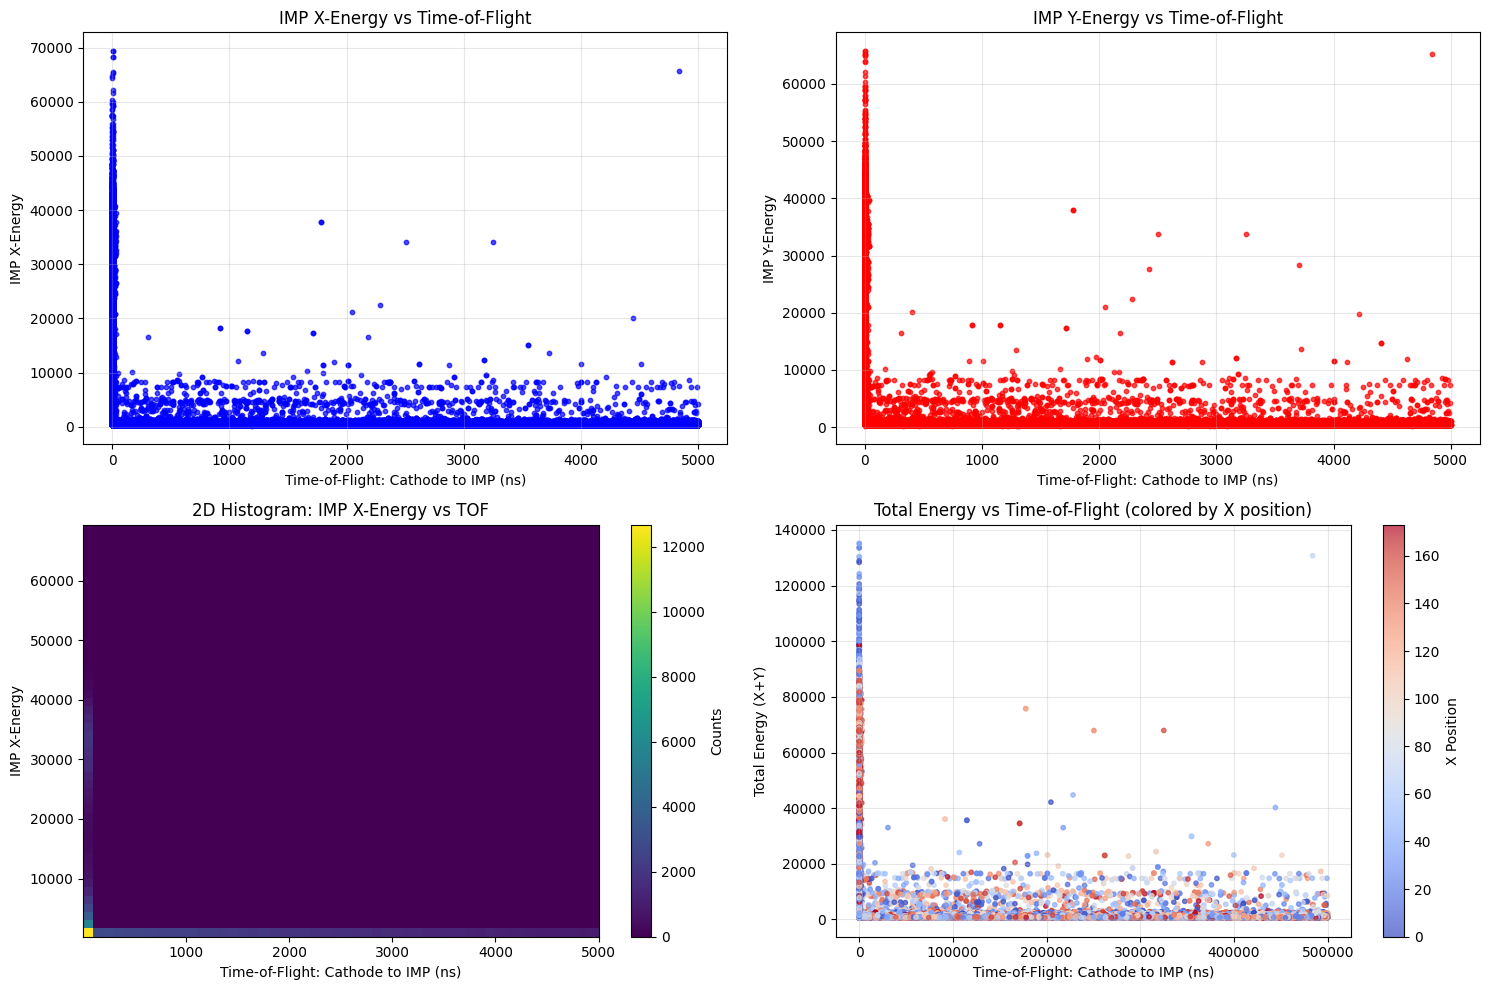


Saved coincidences to processed_data/coincident_imp_ppac.csv


In [19]:
# PPAC-IMP Coincidence Analysis with proper time units
# The 't' column is in seconds, so we need to convert our microsecond window properly

# Define the coincidence window
coincidence_window_us = 3.0  # 1.0 microsecond window
coincidence_window_s = coincidence_window_us * 1e-6  # Convert to seconds

# Set physical constraints for TOF
min_tof_us = 0.00  # 10 nanoseconds minimum TOF
max_tof_us = 5000  # 500 nanoseconds maximum TOF
min_tof_s = min_tof_us * 1e-6  # Convert to seconds
max_tof_s = max_tof_us * 1e-6  # Convert to seconds

print(f"Using coincidence window: {coincidence_window_us} μs = {coincidence_window_s:.9f} s")
print(f"TOF window: {min_tof_us}-{max_tof_us} μs = {min_tof_s:.9f}-{max_tof_s:.9f} s")

# Sort dataframes by time for faster searching (if not already sorted)
cathode_sorted = cathode.sort_values('t').reset_index(drop=True)
anodeV_sorted = anodeV.sort_values('t').reset_index(drop=True)
anodeH_sorted = anodeH.sort_values('t').reset_index(drop=True)
imp_sorted = imp.sort_values('t').reset_index(drop=True)

# Extract time arrays for faster processing
cathode_times = cathode_sorted['t'].values
anodeV_times = anodeV_sorted['t'].values
anodeH_times = anodeH_sorted['t'].values
imp_times = imp_sorted['t'].values

# Define function to find preceding PPAC events within the TOF window
def find_preceding_events(imp_time, detector_times, min_tof_s, max_tof_s):
    """
    Find detector events that occur before the IMP event within the valid TOF window.
    All time values are in seconds.
    
    Parameters:
    -----------
    imp_time : float
        Timestamp of the IMP event in seconds
    detector_times : array
        Array of detector timestamps in seconds
    min_tof_s : float
        Minimum valid time-of-flight in seconds
    max_tof_s : float
        Maximum valid time-of-flight in seconds
        
    Returns:
    --------
    list
        Indices of valid preceding events
    """
    # TOF = imp_time - detector_time (should be positive for valid physical events)
    # We want detector_time values where:
    # imp_time - max_tof ≤ detector_time ≤ imp_time - min_tof
    
    # Calculate the time bounds for valid detector events
    lower_bound = imp_time - max_tof_s  # Detector can't be too early
    upper_bound = imp_time - min_tof_s  # Detector can't be too late
    
    # Find all events within these bounds using binary search for efficiency
    lower_idx = np.searchsorted(detector_times, lower_bound)
    upper_idx = np.searchsorted(detector_times, upper_bound)
    
    if upper_idx > lower_idx:
        return list(range(lower_idx, upper_idx))
    return []

# Start timing the process
import time as time_module
start_time = time_module.time()

# Create a list to store coincident events
coincident_events = []

# Number of IMP events to process
total_imp_events = len(imp_sorted)
print(f"Processing {total_imp_events} IMP events...")

# For each IMP event, find coincident PPAC signals
for idx, imp_row in imp_sorted.iterrows():
    imp_time = imp_row['t']
    
    # Find preceding events in each PPAC detector within TOF window
    cathode_indices = find_preceding_events(imp_time, cathode_times, min_tof_s, max_tof_s)
    anodeV_indices = find_preceding_events(imp_time, anodeV_times, min_tof_s, max_tof_s)
    anodeH_indices = find_preceding_events(imp_time, anodeH_times, min_tof_s, max_tof_s)
    
    # Only proceed if we have coincidences in all three PPAC detectors
    if cathode_indices and anodeV_indices and anodeH_indices:
        # Find the closest preceding event in each detector (highest timestamp)
        closest_cathode_idx = cathode_indices[np.argmax(cathode_times[cathode_indices])]
        closest_anodeV_idx = anodeV_indices[np.argmax(anodeV_times[anodeV_indices])]
        closest_anodeH_idx = anodeH_indices[np.argmax(anodeH_times[anodeH_indices])]
        
        # Get the corresponding rows
        cathode_data = cathode_sorted.iloc[closest_cathode_idx]
        anodeV_data = anodeV_sorted.iloc[closest_anodeV_idx]
        anodeH_data = anodeH_sorted.iloc[closest_anodeH_idx]
        
        # Calculate time-of-flight values (in seconds)
        # TOF = imp_time - detector_time (positive means detector triggered before IMP)
        tof_cathode = imp_time - cathode_data['t']
        tof_anodeV = imp_time - anodeV_data['t']
        tof_anodeH = imp_time - anodeH_data['t']
        
        # Create event data dictionary with all relevant information
        event_data = {
            # IMP data
            'imp_t': imp_time,
            'imp_x': imp_row['x'],
            'imp_y': imp_row['y'],
            'imp_tagx': imp_row['tagx'],
            'imp_tagy': imp_row['tagy'],
            'imp_nfile': imp_row['nfile'],
            'imp_tdelta': imp_row['tdelta'],
            'imp_nX': imp_row['nX'],
            'imp_nY': imp_row['nY'],
            'imp_xE': imp_row['xE'],
            'imp_yE': imp_row['yE'],
            
            # Cathode data
            'cathode_t': cathode_data['t'],
            'cathode_energy': cathode_data['energy'],
            'cathode_board': cathode_data['board'],
            'cathode_channel': cathode_data['channel'],
            'cathode_timetag': cathode_data['timetag'],
            'cathode_nfile': cathode_data['nfile'],
            
            # AnodeV data
            'anodeV_t': anodeV_data['t'],
            'anodeV_energy': anodeV_data['energy'],
            'anodeV_board': anodeV_data['board'],
            'anodeV_channel': anodeV_data['channel'],
            'anodeV_timetag': anodeV_data['timetag'],
            'anodeV_nfile': anodeV_data['nfile'],
            
            # AnodeH data
            'anodeH_t': anodeH_data['t'],
            'anodeH_energy': anodeH_data['energy'],
            'anodeH_board': anodeH_data['board'],
            'anodeH_channel': anodeH_data['channel'],
            'anodeH_timetag': anodeH_data['timetag'],
            'anodeH_nfile': anodeH_data['nfile'],
            
            # Time-of-flight values (in seconds)
            'tof_cathode': tof_cathode,
            'tof_anodeV': tof_anodeV,
            'tof_anodeH': tof_anodeH
        }
        
        coincident_events.append(event_data)
    
    # Print progress every 10,000 events
    if idx % 10000 == 0 and idx > 0:
        elapsed = time_module.time() - start_time
        events_per_sec = idx / elapsed
        remaining_time = (total_imp_events - idx) / events_per_sec if events_per_sec > 0 else 0
        print(f"Processed {idx}/{total_imp_events} events ({idx/total_imp_events*100:.1f}%) - Rate: {events_per_sec:.1f} events/sec - ETA: {remaining_time:.1f} sec")

# Create the dataframe with coincident events
coincident_imp = pd.DataFrame(coincident_events)
print(f"Found {len(coincident_imp)} physically valid coincidences (PPAC before IMP)")

# Calculate total processing time
elapsed_time = time_module.time() - start_time
print(f"Total processing time: {elapsed_time:.2f} seconds")
print(f"Processing rate: {total_imp_events/elapsed_time:.1f} events/second")

# Display TOF statistics in nanoseconds (more intuitive for nuclear physics)
if not coincident_imp.empty:
    print("\nTime-of-Flight Statistics (ns):")
    for tof_col in ['tof_cathode', 'tof_anodeV', 'tof_anodeH']:
        tof_ns = coincident_imp[tof_col] * 1e6  # Convert to nanoseconds
        print(f"{tof_col}:")
        print(f"  Mean: {tof_ns.mean():.2f} ns")
        print(f"  Std Dev: {tof_ns.std():.2f} ns")
        print(f"  Min: {tof_ns.min():.2f} ns")
        print(f"  Max: {tof_ns.max():.2f} ns")

    # Create visualization of energy vs TOF
    plt.figure(figsize=(15, 10))
    
    # 1. X-Energy vs Cathode TOF
    plt.subplot(221)
    plt.scatter(coincident_imp['tof_cathode'] * 1e6, coincident_imp['imp_xE'], 
                alpha=0.7, s=10, c='blue')
    plt.xlabel('Time-of-Flight: Cathode to IMP (ns)')
    plt.ylabel('IMP X-Energy')
    plt.title('IMP X-Energy vs Time-of-Flight')
    plt.grid(True, alpha=0.3)
    
    # 2. Y-Energy vs Cathode TOF
    plt.subplot(222)
    plt.scatter(coincident_imp['tof_anodeH'] * 1e6, coincident_imp['imp_yE'], 
                alpha=0.7, s=10, c='red')
    plt.xlabel('Time-of-Flight: Cathode to IMP (ns)')
    plt.ylabel('IMP Y-Energy')
    plt.title('IMP Y-Energy vs Time-of-Flight')
    plt.grid(True, alpha=0.3)
    
    # 3. 2D histogram (heatmap) 
    plt.subplot(223)
    h = plt.hist2d(coincident_imp['tof_cathode'] * 1e6, coincident_imp['imp_xE'], 
               bins=(50, 50), cmap='viridis')
    plt.colorbar(h[3], label='Counts')
    plt.xlabel('Time-of-Flight: Cathode to IMP (ns)')
    plt.ylabel('IMP X-Energy')
    plt.title('2D Histogram: IMP X-Energy vs TOF')
    
    # 4. Total energy vs TOF
    plt.subplot(224)
    # Calculate total energy
    coincident_imp['total_E'] = coincident_imp['imp_xE'] + coincident_imp['imp_yE']
    
    # Create scatter plot with color based on position
    scatter = plt.scatter(coincident_imp['tof_cathode'] * 1e8, coincident_imp['total_E'],
                         c=coincident_imp['imp_x'], cmap='coolwarm', alpha=0.7, s=10)
    plt.colorbar(scatter, label='X Position')
    plt.xlabel('Time-of-Flight: Cathode to IMP (ns)')
    plt.ylabel('Total Energy (X+Y)')
    plt.title('Total Energy vs Time-of-Flight (colored by X position)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Save to CSV
    coincident_imp.to_csv('processed_data/coincident_imp_ppac.csv', index=False)
    print("\nSaved coincidences to processed_data/coincident_imp_ppac.csv")
else:
    print("No physically valid coincidences found!")

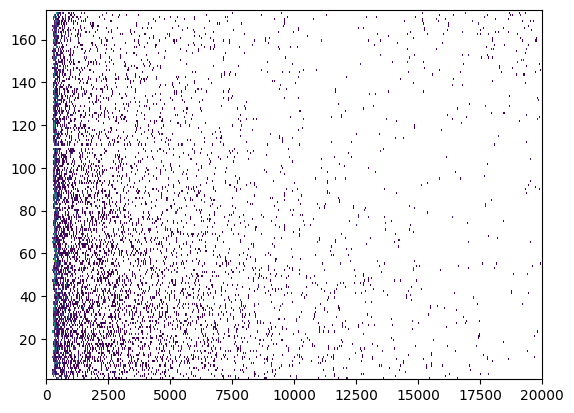

In [15]:
plt.hist2d(coincident_imp['imp_xE'], coincident_imp['imp_x'], bins=(2000, 174), range=((0,20000),(1,174)), cmin=1)
plt.show()

Using coincidence window: 2000 ns before to 0 ns after IMP event
Window in picoseconds: 2000000 ps before to 0 ps after
Processing 409971 IMP events...
Processed 10000/409971 events (2.4%) - Rate: 11188.0 events/sec - ETA: 35.7 sec
Processed 20000/409971 events (4.9%) - Rate: 12498.5 events/sec - ETA: 31.2 sec
Processed 30000/409971 events (7.3%) - Rate: 12965.5 events/sec - ETA: 29.3 sec
Processed 40000/409971 events (9.8%) - Rate: 13264.5 events/sec - ETA: 27.9 sec
Processed 50000/409971 events (12.2%) - Rate: 13167.1 events/sec - ETA: 27.3 sec
Processed 60000/409971 events (14.6%) - Rate: 13093.9 events/sec - ETA: 26.7 sec
Processed 70000/409971 events (17.1%) - Rate: 13024.9 events/sec - ETA: 26.1 sec
Processed 80000/409971 events (19.5%) - Rate: 13056.1 events/sec - ETA: 25.3 sec
Processed 90000/409971 events (22.0%) - Rate: 13034.9 events/sec - ETA: 24.5 sec
Processed 100000/409971 events (24.4%) - Rate: 12930.1 events/sec - ETA: 24.0 sec
Processed 110000/409971 events (26.8%) - 

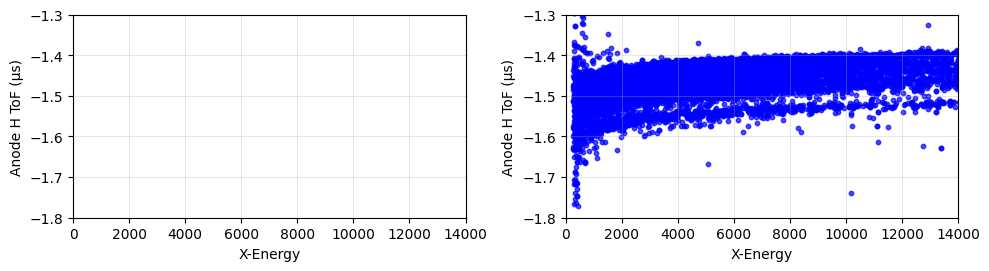


Saved coincidences to processed_data/coincident_imp_ppac_ns_precision.csv


In [39]:
# PPAC-IMP Coincidence Analysis using raw timetag values (picoseconds)
# Looking for coincidences around IMP events with window defined in nanoseconds

# Define the coincidence window in nanoseconds
window_before_ns = 2000  # 2000 ns (2 us) before
window_after_ns = 0   # 1000 ns (1 us) after

# Convert to picoseconds for use with timetag values
window_before_ps = window_before_ns * 1000  # ns → ps
window_after_ps = window_after_ns * 1000    # ns → ps

print(f"Using coincidence window: {window_before_ns} ns before to {window_after_ns} ns after IMP event")
print(f"Window in picoseconds: {window_before_ps} ps before to {window_after_ps} ps after")

# Sort dataframes by timetag for faster searching
cathode_sorted = cathode.sort_values('timetag').reset_index(drop=True)
anodeV_sorted = anodeV.sort_values('timetag').reset_index(drop=True)
anodeH_sorted = anodeH.sort_values('timetag').reset_index(drop=True)
imp_sorted = imp.sort_values('tagx').reset_index(drop=True)  # Using tagx for IMP

# Extract timetag arrays for faster processing
cathode_timetags = cathode_sorted['timetag'].values
anodeV_timetags = anodeV_sorted['timetag'].values
anodeH_timetags = anodeH_sorted['timetag'].values
imp_timetags = imp_sorted['tagx'].values  # Using tagx as the IMP timetag

# Define function to find PPAC events within the time window
def find_events_in_window(imp_timetag, detector_timetags, window_before_ps, window_after_ps):
    """
    Find detector events that occur within a time window around the IMP event.
    All time values are in picoseconds.
    
    Parameters:
    -----------
    imp_timetag : int
        Timestamp of the IMP event in picoseconds
    detector_timetags : array
        Array of detector timestamps in picoseconds
    window_before_ps : int
        Time window before the IMP event in picoseconds
    window_after_ps : int
        Time window after the IMP event in picoseconds
        
    Returns:
    --------
    list
        Indices of events within the window
    """
    # Calculate the time bounds
    lower_bound = imp_timetag - window_before_ps  # Time window before IMP
    upper_bound = imp_timetag + window_after_ps   # Time window after IMP
    
    # Find all events within these bounds using binary search for efficiency
    lower_idx = np.searchsorted(detector_timetags, lower_bound)
    upper_idx = np.searchsorted(detector_timetags, upper_bound)
    
    if upper_idx > lower_idx:
        return list(range(lower_idx, upper_idx))
    return []

# Start timing the process
import time as time_module
start_time = time_module.time()

# Create a list to store coincident events
coincident_events = []

# Number of IMP events to process
total_imp_events = len(imp_sorted)
print(f"Processing {total_imp_events} IMP events...")

# For each IMP event, find coincident PPAC signals
for idx, imp_row in imp_sorted.iterrows():
    imp_timetag = imp_row['tagx']
    
    # Find events in each PPAC detector within the time window
    cathode_indices = find_events_in_window(imp_timetag, cathode_timetags, window_before_ps, window_after_ps)
    anodeV_indices = find_events_in_window(imp_timetag, anodeV_timetags, window_before_ps, window_after_ps)
    anodeH_indices = find_events_in_window(imp_timetag, anodeH_timetags, window_before_ps, window_after_ps)
    
    # Only proceed if we have coincidences in all three PPAC detectors
    if cathode_indices and anodeV_indices and anodeH_indices:
        # Find the closest event in each detector (smallest absolute time difference)
        cathode_diffs = np.abs(cathode_timetags[cathode_indices] - imp_timetag)
        anodeV_diffs = np.abs(anodeV_timetags[anodeV_indices] - imp_timetag)
        anodeH_diffs = np.abs(anodeH_timetags[anodeH_indices] - imp_timetag)
        
        closest_cathode_idx = cathode_indices[np.argmin(cathode_diffs)]
        closest_anodeV_idx = anodeV_indices[np.argmin(anodeV_diffs)]
        closest_anodeH_idx = anodeH_indices[np.argmin(anodeH_diffs)]
        
        # Get the corresponding rows
        cathode_data = cathode_sorted.iloc[closest_cathode_idx]
        anodeV_data = anodeV_sorted.iloc[closest_anodeV_idx]
        anodeH_data = anodeH_sorted.iloc[closest_anodeH_idx]
        
        # Calculate time difference values (in picoseconds)
        # Positive: PPAC after IMP, Negative: PPAC before IMP
        dt_cathode_ps = cathode_data['timetag'] - imp_timetag
        dt_anodeV_ps = anodeV_data['timetag'] - imp_timetag
        dt_anodeH_ps = anodeH_data['timetag'] - imp_timetag
        
        # Create event data dictionary with all relevant information
        event_data = {
            # IMP data
            'imp_timetag': imp_timetag,
            'imp_x': imp_row['x'],
            'imp_y': imp_row['y'],
            'imp_tagx': imp_row['tagx'],
            'imp_tagy': imp_row['tagy'],
            'imp_nfile': imp_row['nfile'],
            'imp_tdelta': imp_row['tdelta'],
            'imp_nX': imp_row['nX'],
            'imp_nY': imp_row['nY'],
            'imp_xE': imp_row['xE'],
            'imp_yE': imp_row['yE'],
            
            # Cathode data
            'cathode_timetag': cathode_data['timetag'],
            'cathode_energy': cathode_data['energy'],
            'cathode_board': cathode_data['board'],
            'cathode_channel': cathode_data['channel'],
            'cathode_nfile': cathode_data['nfile'],
            
            # AnodeV data
            'anodeV_timetag': anodeV_data['timetag'],
            'anodeV_energy': anodeV_data['energy'],
            'anodeV_board': anodeV_data['board'],
            'anodeV_channel': anodeV_data['channel'],
            'anodeV_nfile': anodeV_data['nfile'],
            
            # AnodeH data
            'anodeH_timetag': anodeH_data['timetag'],
            'anodeH_energy': anodeH_data['energy'],
            'anodeH_board': anodeH_data['board'],
            'anodeH_channel': anodeH_data['channel'],
            'anodeH_nfile': anodeH_data['nfile'],
            
            # Time difference values (in picoseconds)
            'dt_cathode_ps': dt_cathode_ps,
            'dt_anodeV_ps': dt_anodeV_ps,
            'dt_anodeH_ps': dt_anodeH_ps,
            
            # Convert to nanoseconds for convenience
            'dt_cathode_ns': dt_cathode_ps / 1000,
            'dt_anodeV_ns': dt_anodeV_ps / 1000,
            'dt_anodeH_ns': dt_anodeH_ps / 1000
        }
        
        coincident_events.append(event_data)
    
    # Print progress every 10,000 events
    if idx % 10000 == 0 and idx > 0:
        elapsed = time_module.time() - start_time
        events_per_sec = idx / elapsed
        remaining_time = (total_imp_events - idx) / events_per_sec if events_per_sec > 0 else 0
        print(f"Processed {idx}/{total_imp_events} events ({idx/total_imp_events*100:.1f}%) - Rate: {events_per_sec:.1f} events/sec - ETA: {remaining_time:.1f} sec")

# Create the dataframe with coincident events
coincident_imp = pd.DataFrame(coincident_events)
print(f"Found {len(coincident_imp)} coincidences within the window")

# Calculate total processing time
elapsed_time = time_module.time() - start_time
print(f"Total processing time: {elapsed_time:.2f} seconds")
print(f"Processing rate: {total_imp_events/elapsed_time:.1f} events/second")




Time Difference Statistics (ns):
dt_cathode_ns:
  Mean: -1464.75 ns
  Std Dev: 56.39 ns
  Min: -1956.12 ns
  Max: -64.00 ns
dt_anodeV_ns:
  Mean: -1381.98 ns
  Std Dev: 166.22 ns
  Min: -1995.37 ns
  Max: -64.37 ns
dt_anodeH_ns:
  Mean: -1334.46 ns
  Std Dev: 189.56 ns
  Min: -1989.37 ns
  Max: -14.57 ns

PPAC cathode before IMP: 46728 events (100.0%)
PPAC cathode after IMP: 0 events (0.0%)


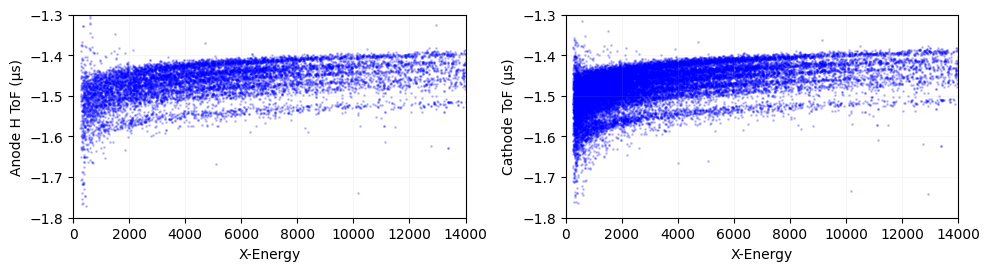

In [70]:
# Display time difference statistics in nanoseconds
if not coincident_imp.empty:
    # Convert nanosecond time differences to microseconds for plotting
    coincident_imp['dt_cathode_us'] = coincident_imp['dt_cathode_ns'] / 1000  # ns → μs
    coincident_imp['dt_anodeV_us'] = coincident_imp['dt_anodeV_ns'] / 1000    # ns → μs
    coincident_imp['dt_anodeH_us'] = coincident_imp['dt_anodeH_ns'] / 1000    # ns → μs
    print("\nTime Difference Statistics (ns):")
    for dt_col in ['dt_cathode_ns', 'dt_anodeV_ns', 'dt_anodeH_ns']:
        print(f"{dt_col}:")
        print(f"  Mean: {coincident_imp[dt_col].mean():.2f} ns")
        print(f"  Std Dev: {coincident_imp[dt_col].std():.2f} ns")
        print(f"  Min: {coincident_imp[dt_col].min():.2f} ns")
        print(f"  Max: {coincident_imp[dt_col].max():.2f} ns")
    
    # Count events with PPAC before vs after IMP
    before_count = (coincident_imp['dt_cathode_ns'] < 0).sum()
    after_count = (coincident_imp['dt_cathode_ns'] >= 0).sum()
    print(f"\nPPAC cathode before IMP: {before_count} events ({before_count/len(coincident_imp)*100:.1f}%)")
    print(f"PPAC cathode after IMP: {after_count} events ({after_count/len(coincident_imp)*100:.1f}%)")

    # Create visualization of energy vs time differences
    plt.figure(figsize=(10, 5))

    # 1. XE vs tof in us
    plt.subplot(221)
    plt.scatter(coincident_imp['imp_xE'], coincident_imp['dt_anodeH_us'], 
                alpha=0.2, s=1, c='blue')
    plt.ylabel('Anode H ToF (μs)')
    plt.xlabel('X-Energy')
    plt.grid(True, alpha=0.1)
    plt.ylim(-1.8, -1.3)
    plt.xlim(0,14000)
    plt.tight_layout()
    
    plt.subplot(222)
    plt.scatter(coincident_imp['imp_xE'], coincident_imp['dt_cathode_us'], 
                alpha=0.2, s=1, c='blue')
    plt.ylabel('Cathode ToF (μs)')
    plt.xlabel('X-Energy')
    plt.grid(True, alpha=0.1)
    plt.ylim(-1.8, -1.3)
    plt.xlim(0,14000)
    plt.tight_layout()
    
#     plt.subplot(222)
#     hexbin = plt.hexbin(coincident_imp['imp_xE'], coincident_imp['dt_anodeH_us'], 
#                        gridsize=1400,  # Number of hexagons across the x-direction
#                        extent=(0, 14000, -1.6, -1.35),  # (xmin, xmax, ymin, ymax)
#                        bins='log',    # Use log scale for counts
#                        cmap='viridis',
#                        mincnt=1)      # Minimum count to display a hexagon
#     plt.xlabel('X-Energy')
#     plt.ylabel('Anode H ToF (μs)')
#     plt.grid(True, alpha=0.3)
#     plt.colorbar(hexbin, label='log10(counts)')
#     plt.show()

else:
    print("No coincidences found!")